In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
import statsmodels.api as sm
from matplotlib.ticker import MaxNLocator
from matplotlib.dates import (FR, MO, MONTHLY, SA, SU, TH, TU, WE,
                              AutoDateFormatter, AutoDateLocator,
                              ConciseDateFormatter, DateFormatter, DayLocator,
                              HourLocator, MicrosecondLocator, MinuteLocator,
                              MonthLocator, RRuleLocator, SecondLocator,
                              WeekdayLocator, YearLocator, rrulewrapper)
import matplotlib.ticker as ticker

import matplotlib.dates as mdates

In [25]:
df=pd.read_csv('df_ekfz.csv')

In [26]:
df_ekfz=df.copy()

In [4]:
#df_ekfz['date'] = pd.to_datetime(df['MONAT'].astype(str), format='%Y%m')

In [17]:
df_ekfz

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Elektro,Hybrid,komb,date
0,0,0,0,1224.0,4523.0,5747.0,2016-01-01
1,1,1,1,1258.0,4576.0,5834.0,2016-02-01
2,2,2,2,1279.0,4670.0,5949.0,2016-03-01
3,3,3,3,1303.0,4814.0,6117.0,2016-04-01
4,4,4,4,1323.0,4824.0,6147.0,2016-05-01
...,...,...,...,...,...,...,...
91,91,91,91,32329.0,103555.0,135884.0,2023-08-01
92,92,92,92,33084.0,104691.0,137775.0,2023-09-01
93,93,93,93,33281.0,103657.0,136938.0,2023-10-01
94,94,94,94,33552.0,103213.0,136765.0,2023-11-01


Text(0, 0.5, 'Vehicles')

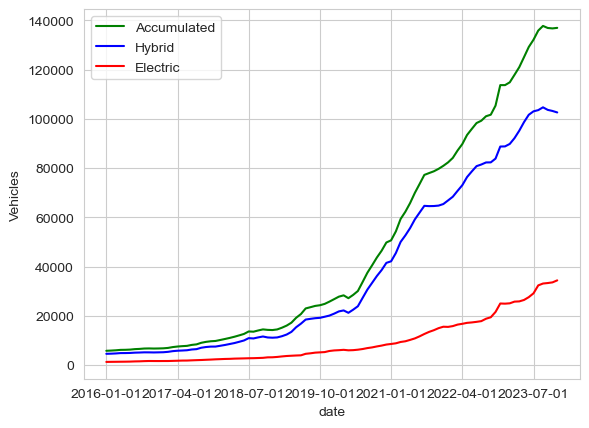

In [52]:
fig, ax = plt.subplots()
sns.set_style('whitegrid')


sns.lineplot(df_ekfz, x='date', y='komb',color='g',label='Accumulated')
sns.lineplot(df_ekfz, x='date', y='Hybrid',color='b',label='Hybrid')
sns.lineplot(df_ekfz, x='date', y='Elektro',color='r',label='Electric')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_ylabel('Vehicles')
#fig.suptitle('Electric vehicles in Munich 2016-2023')


In [7]:
#save dataframe tocsv
df_ekfz.to_csv("df_ekfz.csv")

<Axes: xlabel='date', ylabel='komb'>

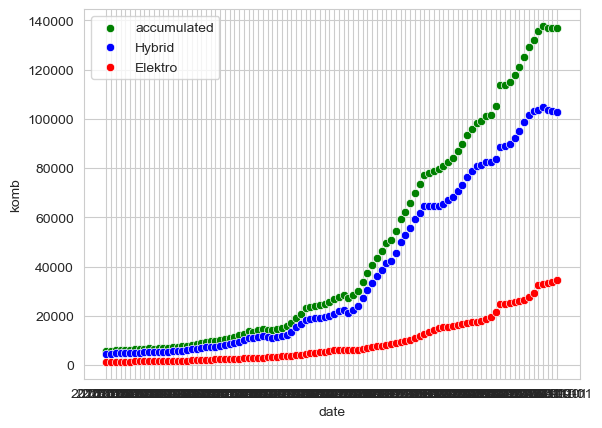

In [27]:

sns.scatterplot(df_ekfz, x='date', y='komb',color='g',label='accumulated')
sns.scatterplot(df_ekfz, x='date', y='Hybrid',color='b',label='Hybrid')
sns.scatterplot(df_ekfz, x='date', y='Elektro',color='r',label='Elektro')

In [28]:
#delete column
df_ekfz.drop(['Unnamed: 0'], axis=1, inplace=True)


In [29]:
def plot_axis(ax, locator=None, xmax='2002-02-01', fmt=None, formatter=None):
    """Set up common parameters for the Axes in the example."""
    ax.spines[['left', 'right', 'top']].set_visible(False)
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5)
    ax.set_xlim(np.datetime64('2024-02-01'), np.datetime64(xmax))
    if locator:
        ax.xaxis.set_major_locator(eval(locator))
        ax.xaxis.set_major_formatter(DateFormatter(fmt))
    else:
        ax.xaxis.set_major_formatter(eval(formatter))
    ax.text(0.0, 0.2, locator or formatter, transform=ax.transAxes,
            fontsize=14, fontname='Monospace', color='tab:blue')
    

In [30]:
def format_fn(tick_val, tick_pos):
    if int(tick_val) in xs:
        return labels[int(tick_val)]
    else:
        return ''

Text(0.5, 0.98, 'Date Formatters')

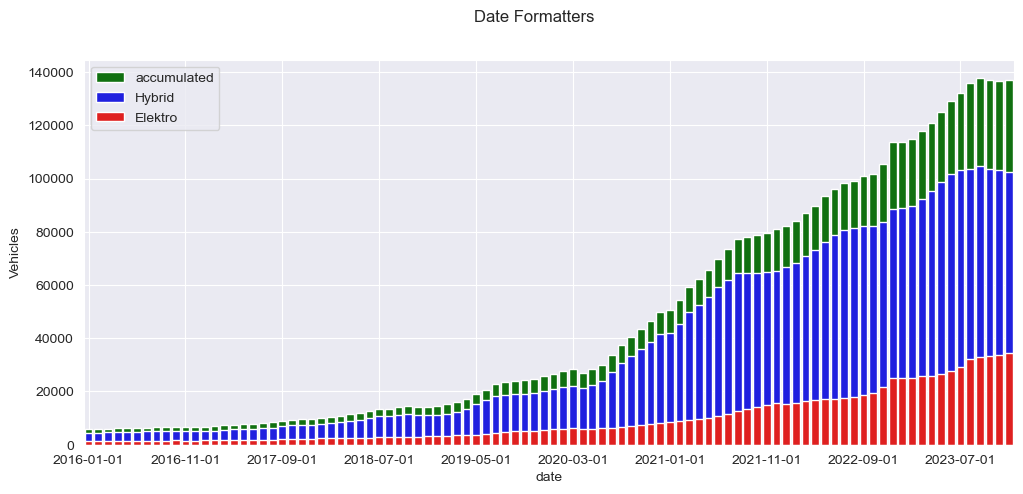

In [12]:
'''locators = [
    # locator as str, xmax, fmt
    ('AutoDateLocator(maxticks=8)', '2003-02-01', '%Y-%m'),
    ('YearLocator(month=4)', '2003-02-01', '%Y-%m'),
    ('MonthLocator(bymonth=[4, 8, 12])', '2003-02-01', '%Y-%m'),
    ('DayLocator(interval=180)', '2003-02-01', '%Y-%m-%d'),
    ('WeekdayLocator(byweekday=SU, interval=4)', '2000-07-01', '%a %Y-%m-%d'),
    ('HourLocator(byhour=range(0, 24, 6))', '2000-02-04', '%H h'),
    ('MinuteLocator(interval=15)', '2000-02-01 02:00', '%H:%M'),
    ('SecondLocator(bysecond=(0, 30))', '2000-02-01 00:02', '%H:%M:%S'),
    ('MicrosecondLocator(interval=1000)', '2000-02-01 00:00:00.005', '%S.%f'),
    ('RRuleLocator(rrulewrapper(freq=MONTHLY, \nbyweekday=(MO, TU, WE, TH, FR), '
     'bysetpos=-1))', '2000-07-01', '%Y-%m-%d'),
]
#formatters = [
    'AutoDateFormatter(ax.xaxis.get_major_locator())',
    'ConciseDateFormatter(ax.xaxis.get_major_locator())',
    'DateFormatter("%b %Y")',
]
'''
xs = range(26)

labels = df_ekfz['date']

fig, ax = plt.subplots(figsize=(12, 5))

ax=sns.barplot(df_ekfz, x='date', y='komb',color='g',label='accumulated')
ax=sns.barplot(df_ekfz, x='date', y='Hybrid',color='b',label='Hybrid')
ax=sns.barplot(df_ekfz, x='date', y='Elektro',color='r',label='Elektro')
#ax.xaxis.set_major_formatter(format_fn)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(True)
ax.set_ylabel('Vehicles')
fig.suptitle('Date Formatters')


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U10'), dtype('float64')) -> None

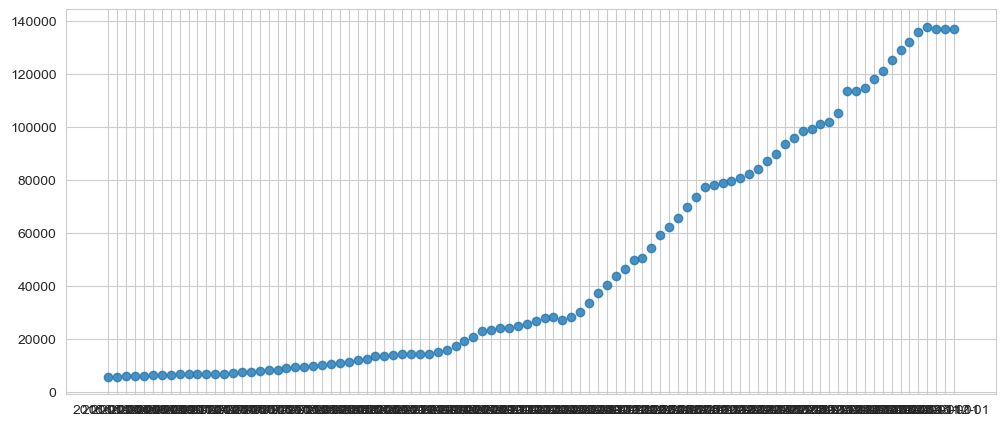

In [49]:
fig, ax = plt.subplots(figsize=(12, 5))

ax=sns.regplot(df_ekfz, x='date', y='komb')
#ax=sns.regplot(df_ekfz, x='date', y='Hybrid',color='b',label='Hybrid')
#ax=sns.regplot(df_ekfz, x='date', y='Elektro',color='r',label='Elektro')

In [ ]:
print(lo)

In [34]:
df_ekfz1.head(50)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Elektro,Hybrid,komb,date
0,0,0,0,1224.0,4523.0,5747.0,2016-01-01
1,1,1,1,1258.0,4576.0,5834.0,2016-02-01
2,2,2,2,1279.0,4670.0,5949.0,2016-03-01
3,3,3,3,1303.0,4814.0,6117.0,2016-04-01
4,4,4,4,1323.0,4824.0,6147.0,2016-05-01
5,5,5,5,1358.0,4872.0,6230.0,2016-06-01
6,6,6,6,1431.0,4989.0,6420.0,2016-07-01
7,7,7,7,1470.0,5045.0,6515.0,2016-08-01
8,8,8,8,1549.0,5119.0,6668.0,2016-09-01
9,9,9,9,1599.0,5109.0,6708.0,2016-10-01


In [ ]:
#dfl=pd.read_csv('../Data/Ladesaeulenregister_mit_Bezirk.csv')

In [36]:
dfx=pd.read_csv('df_ekfz1.csv')
dfx

,Unnamed: 0.1,Unnamed: 0,Elektro,Hybrid,komb,date,date_ordinal
0,0,0,1224.0,4523.0,5747.0,2016-01-01,735964
1,1,1,1258.0,4576.0,5834.0,2016-02-01,735995
2,2,2,1279.0,4670.0,5949.0,2016-03-01,736024
3,3,3,1303.0,4814.0,6117.0,2016-04-01,736055
4,4,4,1323.0,4824.0,6147.0,2016-05-01,736085
...,...,...,...,...,...,...,...
91,91,91,32329.0,103555.0,135884.0,2023-08-01,738733
92,92,92,33084.0,104691.0,137775.0,2023-09-01,738764
93,93,93,33281.0,103657.0,136938.0,2023-10-01,738794
94,94,94,33552.0,103213.0,136765.0,2023-11-01,738825


In [ ]:
#cut data from 2019-01-01 = 737060

In [50]:
df_ekfz2=dfx[(dfx['date_ordinal']>=737060)]
df_ekfz2

,Unnamed: 0.1,Unnamed: 0,Elektro,Hybrid,komb,date,date_ordinal
36,36,36,3249.0,11177.0,14426.0,2019-01-01,737060
37,37,37,3456.0,11674.0,15130.0,2019-02-01,737091
38,38,38,3633.0,12357.0,15990.0,2019-03-01,737119
39,39,39,3738.0,13442.0,17180.0,2019-04-01,737150
40,40,40,3837.0,15337.0,19174.0,2019-05-01,737180
41,41,41,3908.0,16769.0,20677.0,2019-06-01,737211
42,42,42,4522.0,18438.0,22960.0,2019-07-01,737241
43,43,43,4725.0,18735.0,23460.0,2019-08-01,737272
44,44,44,4993.0,18992.0,23985.0,2019-09-01,737303
45,45,45,5110.0,19146.0,24256.0,2019-10-01,737333


In [38]:
df_ekfz1=df_ekfz.copy()

In [40]:
df_ekfz2

,Unnamed: 0.1,Unnamed: 0,Elektro,Hybrid,komb,date,date_ordinal
36,36,36,3249.0,11177.0,14426.0,2019-01-01,737060
37,37,37,3456.0,11674.0,15130.0,2019-02-01,737091
38,38,38,3633.0,12357.0,15990.0,2019-03-01,737119
39,39,39,3738.0,13442.0,17180.0,2019-04-01,737150
40,40,40,3837.0,15337.0,19174.0,2019-05-01,737180
41,41,41,3908.0,16769.0,20677.0,2019-06-01,737211
42,42,42,4522.0,18438.0,22960.0,2019-07-01,737241
43,43,43,4725.0,18735.0,23460.0,2019-08-01,737272
44,44,44,4993.0,18992.0,23985.0,2019-09-01,737303
45,45,45,5110.0,19146.0,24256.0,2019-10-01,737333


Text(0.5, 0, 'time')

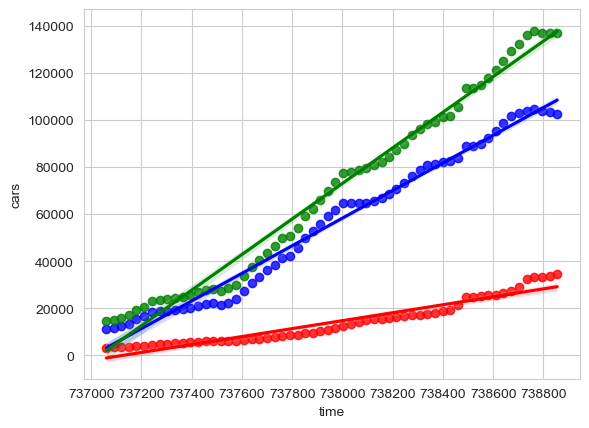

In [51]:
#df_ekfz2['date_ordinal'] = pd.to_datetime(df_ekfz2['date']).apply(lambda date: date.toordinal())
y_e=df_ekfz2['Elektro']
y_h=df_ekfz2['Hybrid']
y_k=df_ekfz2['komb']
x=df_ekfz2['date_ordinal']



fig, ax = plt.subplots()
sns.regplot(df_ekfz2, x='date_ordinal', y='Elektro', color='r')
sns.regplot(df_ekfz2, x='date_ordinal', y='Hybrid', color='b')
sns.regplot(df_ekfz2, x='date_ordinal', y='komb', color='g')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('cars')
plt.xlabel('time')


In [ ]:
X = df_ekfz1['date_ordinal']
y_e = df_ekfz1['Elektro']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model_e= sm.OLS(y_e, X).fit()
model_h= sm.OLS(y_h, X).fit()
model_k= sm.OLS(y_k, X).fit()
#print(X,y_e)
# Print the model summary
print(model_e.summary())
print(model_h.summary())
print(model_k.summary())

In [ ]:
from datetime import datetime
#convert date in number to predict future value
date_str = '2026-01-01'
date_obj = datetime.strptime(date_str, '%Y-%m-%d')
future_date_ordinal = date_obj.toordinal()

print(ordinal_value)

In [ ]:
# Convert the future date into a numeric format
#future_date_ordinal = 738945  # Assuming this is the future date in ordinal format

# Predict the 'Elektro' value for the future date
future_data = {'const': 1, 'date_ordinal': future_date_ordinal}
future_df = pd.DataFrame([future_data])
future_prediction_e = model_e.predict(future_df)
future_prediction_h = model_h.predict(future_df)
future_prediction_k = model_k.predict(future_df)
print("Predicted 'Elektro' value for the future date is:", round(future_prediction_e[0]))
print("Predicted 'Hybrid' value for the future date is:", round(future_prediction_h[0]))
print("Predicted 'accumulated' value for the future date is:", round(future_prediction_k[0]))